In [2]:
#%pip install pandas statsmodels

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<h1 style="text-align:center;">Output Model</h1>

In [4]:
csv_filename = 'Data/SP500_last_decade.csv'
sp500_data = pd.read_csv(csv_filename, parse_dates=['Date'], index_col='Date')
df_filtered = sp500_data[['Close','Open']]
df_filtered

,Close,Open
Date,,
2014-10-08,1968.890015,1935.550049
2014-10-09,1928.209961,1967.680054
2014-10-10,1906.130005,1925.630005
2014-10-13,1874.739990,1905.650024
2014-10-14,1877.699951,1877.109985
...,...,...
2024-09-30,5762.479980,5726.520020
2024-10-01,5708.750000,5757.729980
2024-10-02,5709.540039,5698.140137


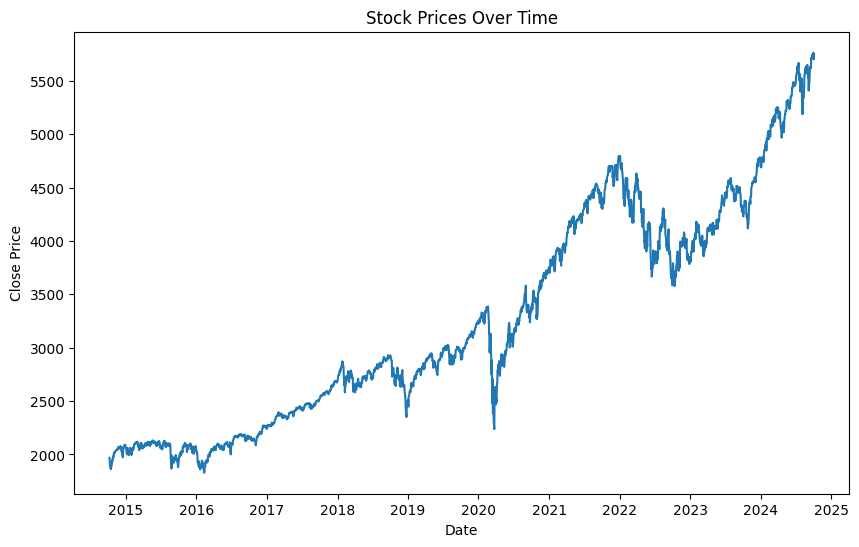

In [5]:
# Load your dataset (assuming you have a CSV file with date and stock prices)
df = pd.read_csv(csv_filename)

# Ensure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# If we only need the 'Close' prices, for example:
df = df['Close']

# Optional: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()



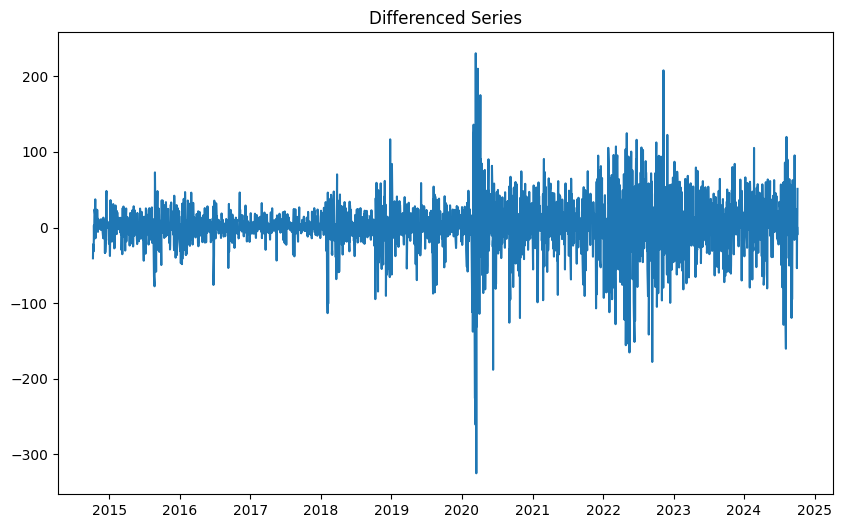

In [6]:
# Quick differencing example (if needed to make the series stationary)
df_diff = df.diff().dropna()

plt.figure(figsize=(10, 6))
plt.plot(df_diff)
plt.title('Differenced Series')
plt.show()


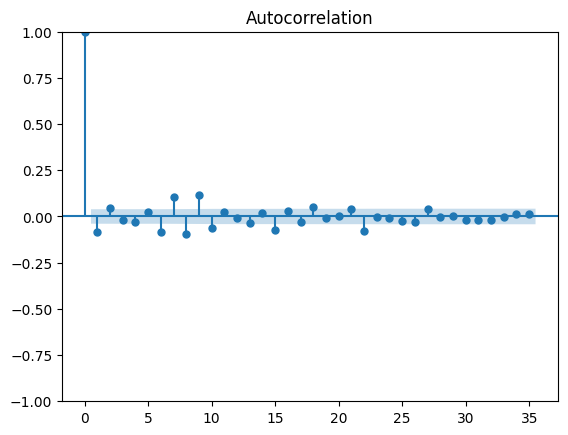

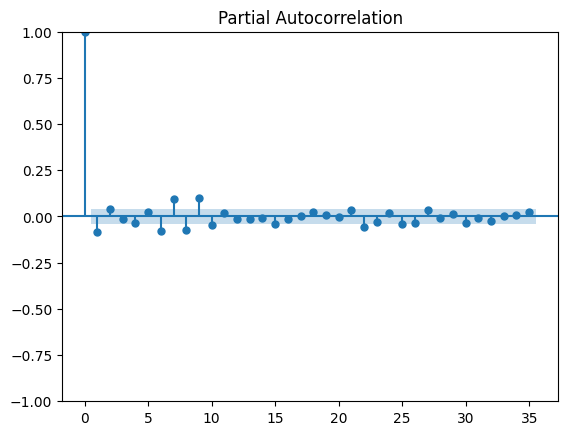

In [7]:
plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()


In [12]:
# Fit the ARIMA model (example values for p, d, q are 1, 1, 1)
model = ARIMA(df, order=(10, 1, 10))
arima_result = model.fit()

# Summary of the model
print(arima_result.summary())


c:\Users\robve.LAPTOP-PCBR1UJF\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\robve.LAPTOP-PCBR1UJF\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\robve.LAPTOP-PCBR1UJF\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\robve.LAPTOP-PCBR1UJF\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\ts

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2515
Model:               ARIMA(10, 1, 10)   Log Likelihood              -12568.073
Date:                Tue, 19 Nov 2024   AIC                          25178.145
Time:                        18:36:06   BIC                          25300.568
Sample:                             0   HQIC                         25222.578
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4435      0.520     -0.853      0.394      -1.463       0.576
ar.L2          0.0765      0.671      0.114      0.909      -1.238       1.391
ar.L3         -0.2517      0.636     -0.396      0.6

c:\Users\robve.LAPTOP-PCBR1UJF\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\robve.LAPTOP-PCBR1UJF\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


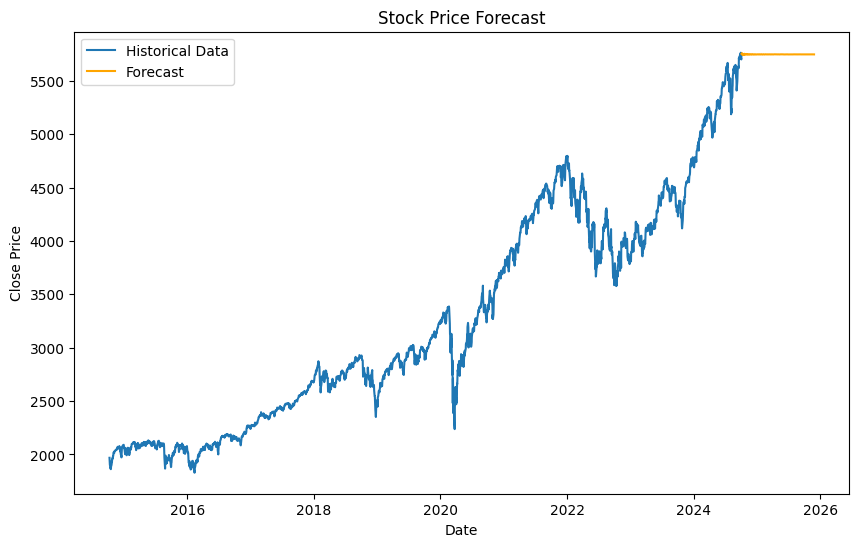

In [13]:
# Forecasting the next 10 data points
forecast = arima_result.forecast(steps=300)
# Plot the forecast along with the actual data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df, label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=300, freq='B'), forecast, label='Forecast', color='orange')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
# Forecasting the next 10 data points
forecast = arima_result.forecast(steps=10)

# Display the forecasted values
print("Forecasted Values:")
print(forecast)


Forecasted Values:
2515    5746.351725
2516    5748.162552
2517    5747.467549
2518    5747.734294
2519    5747.631916
2520    5747.671209
2521    5747.656128
2522    5747.661916
2523    5747.659695
2524    5747.660547
Name: predicted_mean, dtype: float64


c:\Users\robve.LAPTOP-PCBR1UJF\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
